# The Convolution Neural Network implmenting in Tensorflow / Keras
### Data from : Intel Image Classification

# Loading the Library

**API explanation**

* 1. The first one of the library is to format the environment for utilizing same API in Python3
```python
from __future__ import absolute_import, division, print_function, unicode_literals
```
-----------------------------------------------------------------------------------------------------

* 2. Then the standard import library from **tensorflow** and its subsidiary **keras**
```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
```

In this case, we will implement the Convolution Neural Network or the so-called **CNN**.

--------------
- **Sequential**

The backbone of all Full Connected Neural Network. 


- **Dense**

The so-called Neurons in our NN, we can determined how many decision through this.

- **Dropout**

Sometimes we have to randomly drop some neurons in case the NN over fitting in the model. 

Just like some of the people only $Know$ the answer rather than $Understand$.

- **Activation**

Like our actual brain, the electric signal must over the threshold then therby activate the motion.

- **Flatten**

Once we setup all the prepared data, we flatten the data as the input neurons.

- **Conv2D**

The most essential code to implement the **convolution** in the datasets. 2D is about that we are taking advantage on the 2D images.

- **MaxPooling2D**

As we are implementing the convolution, we will try to filter the features and then using the `maxpool` techniques to downgrad the iamges so as to be set up as the imput. 

----

* 3. The Helper Libraries
```python
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline   # Which is needed in Jupyter Notebook as you liked to show the images with matplotlib
```

- **os**

os, the so-called Operating System, is the Python API to help you access with the files, folders, etc.. in your computers

- **cv2**

The subsidary from OpenCV to implement in Python, which is pervail in images processing.

In [1]:
# Import Necessary Libraries

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

# Comfirming Tensorflow is using GPU


The tensorflow APIs about testing whether the GPU is functioning are as follow :

- **The Python Code**

```python
  if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

  else:
    print("Please install GPU version of TF")
```


- **output** 

 Default GPU Device:/device:GPU:0

In [2]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


# List the Categories of the datasets

We will utilize the `os.listdir(path = datasets' path)` to help us identify the class

In [3]:
# Categories
classes = os.listdir(path = 'archive/seg_train/seg_train')
print(classes)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


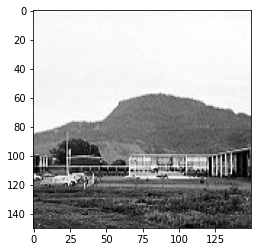

In [4]:
path_train = 'archive/seg_train/seg_train'
path_test = 'archive/seg_test/seg_test'


for category in classes:
    path = os.path.join(path_train, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

In [5]:
print(img_array.shape)

(150, 150)


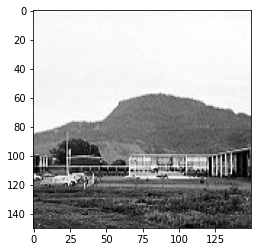

In [6]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [7]:
training_data = []
testing_data = []

def create_training_data():
    for category in classes:
        path = os.path.join(path_train, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
def create_testing_data():
    for category in classes:
        path = os.path.join(path_test, category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_training_data()
create_testing_data()

In [8]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

for sample in training_data[:10]:
    print(sample[1])
    
for sample in testing_data[:10]:
    print(sample[1])

3
1
5
1
5
2
5
5
3
2
1
2
2
3
2
1
1
3
3
0


In [9]:
test_images = []
test_labels = []
train_images = []
train_labels = []

In [10]:
for features, label in training_data:
    train_images.append(features)
    train_labels.append(label)
    
for features, label in testing_data:
    test_images.append(features)
    test_labels.append(label)
    

train_images = np.array(train_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array(train_labels)

test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array(test_labels)

In [11]:
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(14034, 150, 150, 1)
(14034,)
(3000, 150, 150, 1)
(3000,)


In [12]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()

In [14]:
from tensorflow.keras import backend as K
import tensorflow as tf
K.clear_session()
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters = 256, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (150, 150, 1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))

#model.add(tf.keras.layers.Dropout(0.3))
# Second Convolution layer
model.add(tf.keras.layers.Conv2D(filters = 512, kernel_size = 2, padding = 'same', activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = 2))
model.add(tf.keras.layers.Dropout(0.3))

# Fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation = 'relu'))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

#Take a look at the model summary
model.summary()

ResourceExhaustedError: failed to allocate memory [Op:Mul]

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', 'MeanSquaredError'])

In [ ]:
history = model.fit(train_images, 
                    train_labels,
                    batch_size=16,
                    epochs=25,
                    validation_split = 0.2)

print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model train accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc = 'upper right')
plt.show()

In [ ]:
# Evaluating the model using the test set
loss, accuracy, MSE = model.evaluate(test_images, test_labels, verbose = 1)
print('\nTest accuracy:', accuracy)

In [ ]:
# Making predictions from the test_images

predictions = model.predict(test_images)

In [ ]:
# Reshape input data from (IMG_SIZE, IMG_SIZE) to (IMG_SIZE, IMG_SIZE, 1)
w, h = IMG_SIZE, IMG_SIZE
train_images = train_images.reshape(train_images.shape[0], w, h)
test_images = test_images.reshape(test_images.shape[0], w, h)


# Helper functions to plot images 
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()